## Описание исследования

Исследование: 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Шаги:
- [x] Открыть данные 
- [x] Подготовить данные 
- [x] Проведите исследовательский анализ данных 
- [x] Составьте портрет пользователя каждого региона 
- [x] Проверьте гипотезы 
- [x] Напишите общий вывод 

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Открыть данные 

**В данном пункте необходимо выполнить следующее:** 

Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv (r"C:\Users\nssavinov\Desktop\Пректы практикум\5 Сборный проект\games.csv")
display (data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Итоги** данного пункта: 

1. В таблице имеются пропуски которые необходимо устанить
2. Привести наименования к нижнему регистру
3. Преобразовать столбцы в нужные типы  

## Подготовьте данные

**В данном пункте необходимо выполнить следующее:** 

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:

        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

        Опишите причины, которые могли привести к пропускам;

        Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Замените названия столбцов (приведите к нижнему регистру);

In [3]:
data.rename (columns = str.lower , inplace = True)

In [4]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Проверим на наличие дубликатов, если 0 то дубликатов нет. 

In [5]:
data.duplicated().sum()

0

Проверим на неявные дубликаты

In [6]:
list(data['name'].sort_values().unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [7]:
list(data['genre'].sort_values().unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 nan]

In [8]:
list(data['year_of_release'].sort_values().unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

**Неявных дубликатов** не обнаруженно. 

In [9]:
# Код ревьюера
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Из выгрузки информации в пункте 3 проверим информацию в столбце year_of_release и user_score, и при необходимость нужно перевести в формат inf и float, соответсвенно. 

In [10]:
list(data['year_of_release'].unique())

[2006.0,
 1985.0,
 2008.0,
 2009.0,
 1996.0,
 1989.0,
 1984.0,
 2005.0,
 1999.0,
 2007.0,
 2010.0,
 2013.0,
 2004.0,
 1990.0,
 1988.0,
 2002.0,
 2001.0,
 2011.0,
 1998.0,
 2015.0,
 2012.0,
 2014.0,
 1992.0,
 1997.0,
 1993.0,
 1994.0,
 1982.0,
 2016.0,
 2003.0,
 1986.0,
 2000.0,
 nan,
 1995.0,
 1991.0,
 1981.0,
 1987.0,
 1980.0,
 1983.0]

Видим что года заполнены целыми числами, поэтому данный тип можно преобразовать в int, Кроме того видно, что имеются пропуски которые невозможно заполнить каким то значением (типа медианы или среднего), поэтому

**Пустые значения** заполним значением -1, и преобразуем в инт

In [11]:
data = data.drop (data [data['year_of_release'].isna()].index).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype(int)

In [12]:
list(data['user_score'].sort_values().unique())

['0',
 '0.2',
 '0.3',
 '0.5',
 '0.6',
 '0.7',
 '0.9',
 '1',
 '1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '2',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '2.9',
 '3',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '4',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '5',
 '5.1',
 '5.2',
 '5.3',
 '5.4',
 '5.5',
 '5.6',
 '5.7',
 '5.8',
 '5.9',
 '6',
 '6.1',
 '6.2',
 '6.3',
 '6.4',
 '6.5',
 '6.6',
 '6.7',
 '6.8',
 '6.9',
 '7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '8',
 '8.1',
 '8.2',
 '8.3',
 '8.4',
 '8.5',
 '8.6',
 '8.7',
 '8.8',
 '8.9',
 '9',
 '9.1',
 '9.2',
 '9.3',
 '9.4',
 '9.5',
 '9.6',
 '9.7',
 'tbd',
 nan]

Видно что присутствуют значения - строка с непонятной оценкой "tbd". рассчмотрим данный датасет

In [13]:
display('Размер датасета:', len (data[data['user_score'] == 'tbd']))
data[data['user_score'] == 'tbd']['year_of_release'].value_counts()

'Размер датасета:'

2376

year_of_release
2009    405
2010    331
2008    326
2011    217
2002    192
2007    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: count, dtype: int64

**Заменим данное значение Nan**

In [14]:
display (data.info())
data_user_tbd = data ['user_score'] == 'tbd'
data.loc[data_user_tbd, 'user_score'] =np.nan

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


Проверим на наличие данных

In [15]:
data [data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
data['user_score'] = data['user_score'].astype (float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


В данном пункте изменили тип года с флоат на инт (чтобы быть уверенными что все поля имеют целые значение), а так же заполнили пропуски значением -1, для того чтобы было отображение что было указано без года реализации. 

Поле оценку пользователей перевели в тип флоат, из обжект, избавились от значений строки 'tdb' заполнили 0. 

### Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать; - **Выполнено в предыдущем пункте**

1. Пропуски в name 

Данных пропуска 2 и непонятно что за игра в данной таблице, поэтому удалим эти данные. 

Причины появления : 
- скорее всего при составлении датасета эти данные не были занесены. 

In [18]:
display (data[data['name'].isna()])
data = data.drop (data [data['name'].isna()].index).reset_index(drop=True)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Обратим внимание, что пропуски пропали  и в поле genre. 

Остаются пропуски в 3х полях с рейтингом, заполнить их к сожалению невозможно и удалить тоже. Оставим как есть

Причина появления: 
Скорее всего данные игры просто не были оценены. 

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [19]:
data['common_sales'] = data ['na_sales'] + data ['eu_sales'] + data ['jp_sales'] + data ['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод** 

Были выполенены следующие действия: 
- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
- [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x] Опишите причины, которые могли привести к пропускам;
- [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

##  Проведите исследовательский анализ данных

### Изучить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Кол-во игр')

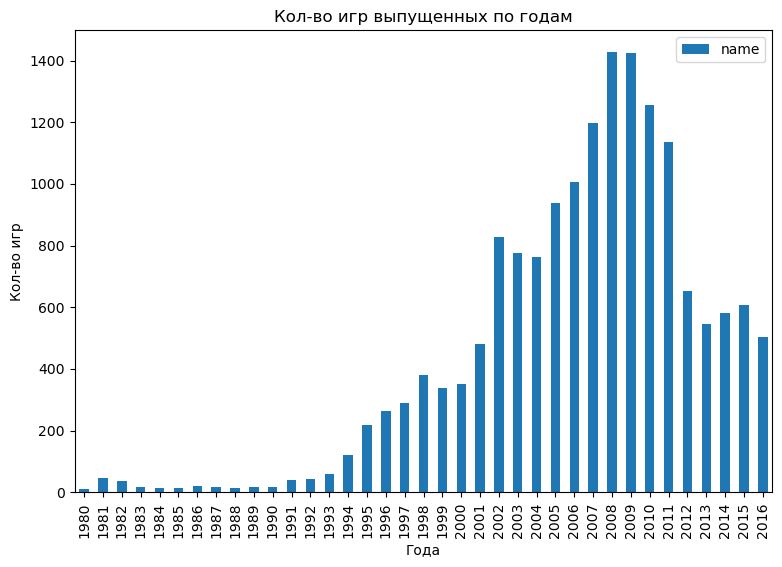

In [20]:
plot = (data.pivot_table (index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot (kind = 'bar', title = 'Кол-во игр выпущенных по годам', figsize = (9,6))
)
plot.set_xlabel ('Года')
plot.set_ylabel ('Кол-во игр')

Можно сделать следующие **выводы**: 
1. Основной, массовый выпуск игр происходил после 2000 годов, где  можно наблюдать рост до 2008 года, а после снижение. 
2. Данные относящиеся к -1 и < 2000 года можно считать не релевантными, т.к. прогноз ведется на 2017 год. + их кол-во так же стремительно мало по сравнению с другими годами. 
3. Скорее всего для проведения анализа, который поможет спрогнозирвоать какие либо показатели необходимо будет рассматривать значения в правой части данного графика (т.е. ближе к 2016 году). 

### Изучить, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
best_ten_platform = (data
    .pivot_table (index = 'platform' , values = 'common_sales', aggfunc = 'sum')
    .sort_values (by = 'common_sales', ascending = False)
    .reset_index()
    .head(4)
    ['platform']
)
best_ten_platform

0     PS2
1    X360
2     PS3
3     Wii
Name: platform, dtype: object

Выбрали 4 самых монетизированных платформ.

Text(0.5, 0, 'Год')

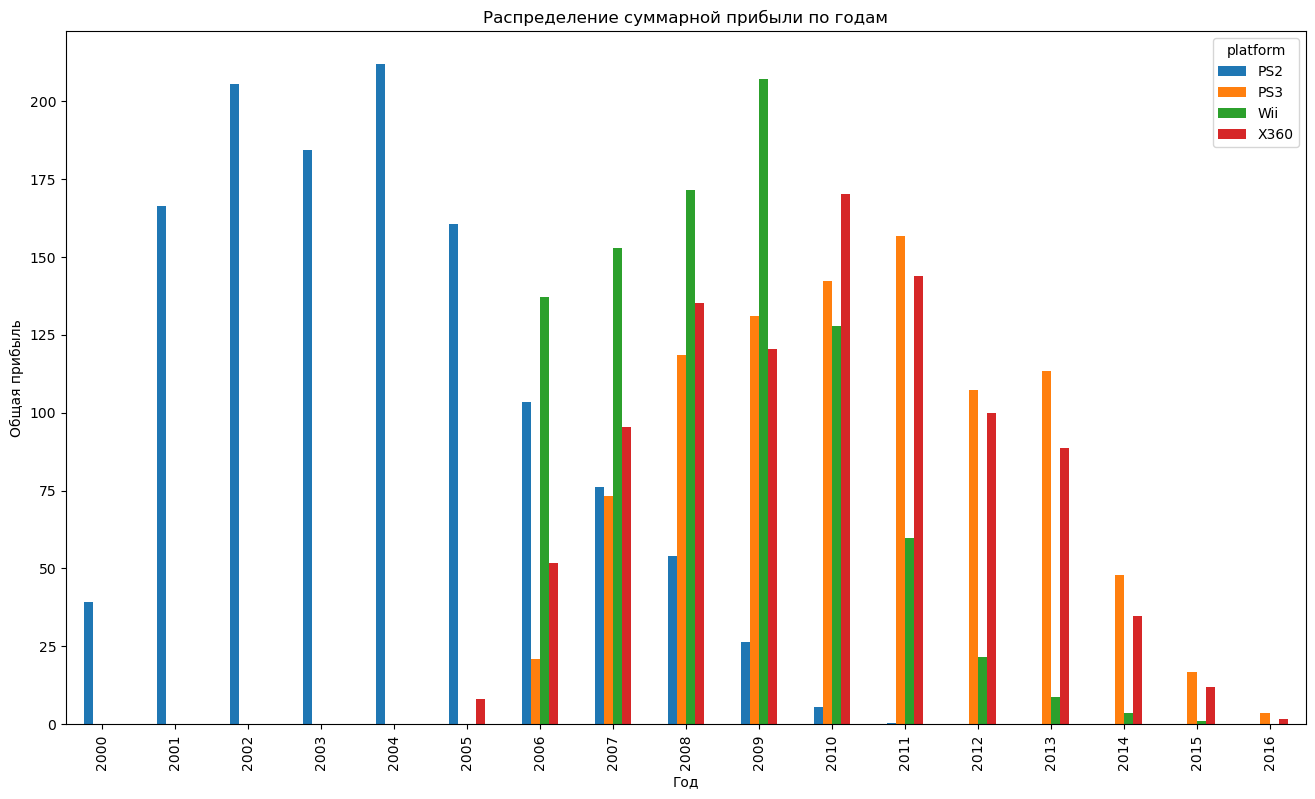

In [22]:
plott = (data [data ['platform'].isin(best_ten_platform)]
    .pivot_table (index = 'year_of_release', columns = 'platform', values = 'common_sales', aggfunc = 'sum')
    .plot (kind = 'bar', title = 'Распределение суммарной прибыли по годам', figsize = [16,9])
)
plott.set_ylabel('Общая прибыль')
plott.set_xlabel('Год')

Выбрали 4 самых монетизированных платформы для продаж игр и посмотрели на суммарное распределение прибыли по годам. Видно что тенденция на рынке +- одинаковая и похожа на Пуасонское распределение, а именно, то что имеется некоторый подъем, после пик, и снижение. Общая тенденция на рынке в среднем у больших корпораций показывает что держутся они около 10 лет: 

PS2 2000 - 2010

PS3 2006 - 2016 (В конце 2016 наблюдается сильное падение по сравнению с пиковыми значениями)

Wii 2006 - 2015

X360 2005 -2016

### Выбираем данные за соответствующий актуальный период.
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

С учетом того что мы увидели, что основной период "Расцвет-Падение" игровой платформы это 10 лет, то соответственно из этого следуюет вывод что для того чтобы проанализировать данный на следующий год, достаточно рассмотреть половину цикла, т.е. 5-6 лет, после чего можно будет делать выводы.

Т.е. увидеть тренд, расцвет платформы или ее затухание. 

Сформируем новый датасет! 

In [23]:
data_actual = data [data ['year_of_release'] >= 2014] 
display(data_actual.info())
data_actual.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  common_sales     1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


**Не учитывайте в работе данные за предыдущие годы.**

Далее работаем с сформированным датасетом.

### Платформы лидеры текущего периода
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

проверим какие платформы остались в нашем датасете и как дела с их монетизацией

In [24]:
data_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Построим для каждого из них график по годам: 

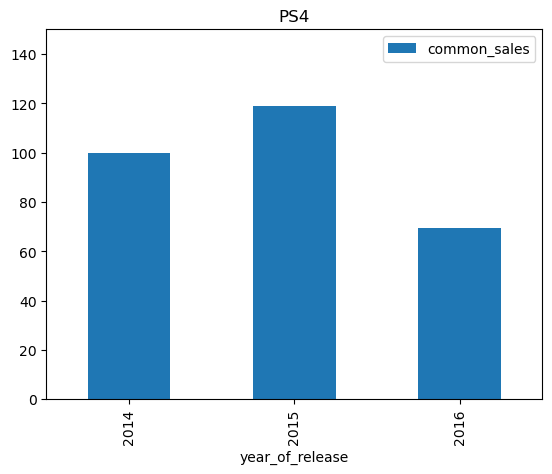

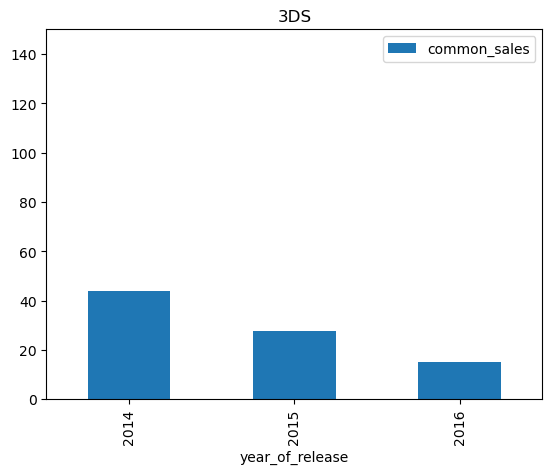

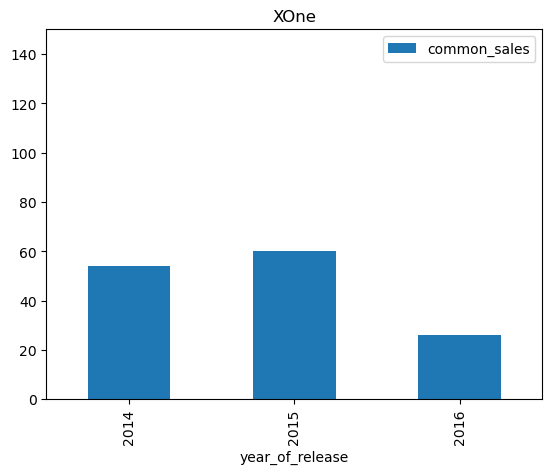

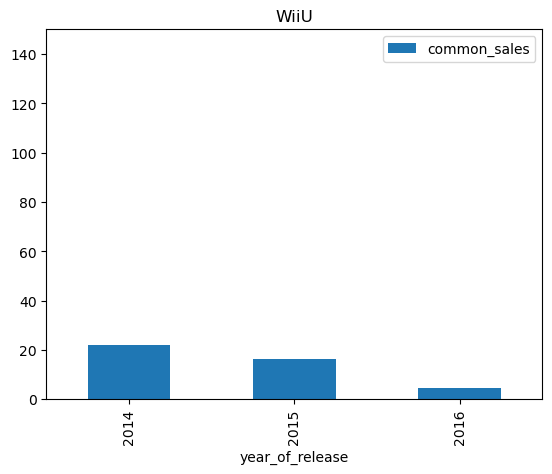

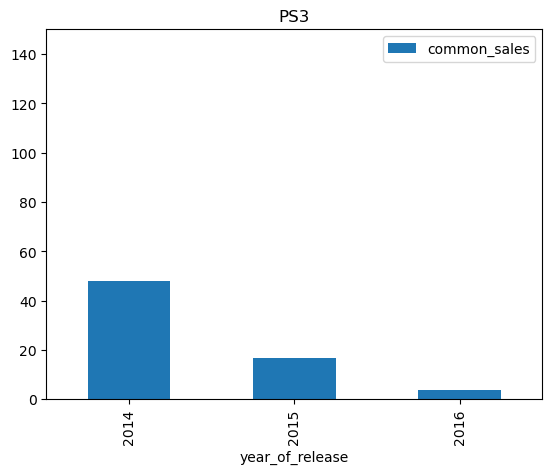

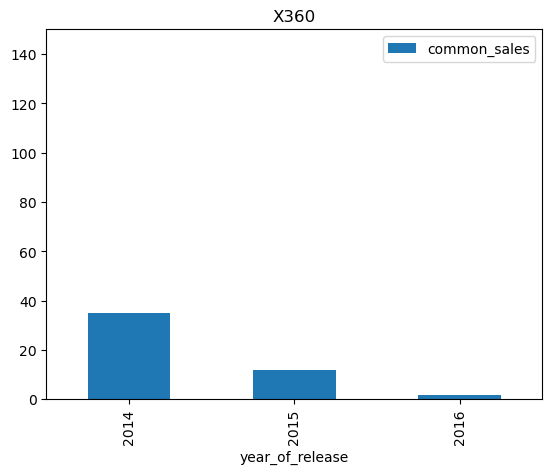

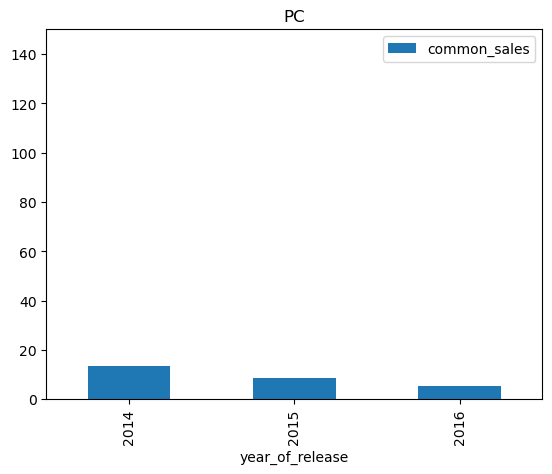

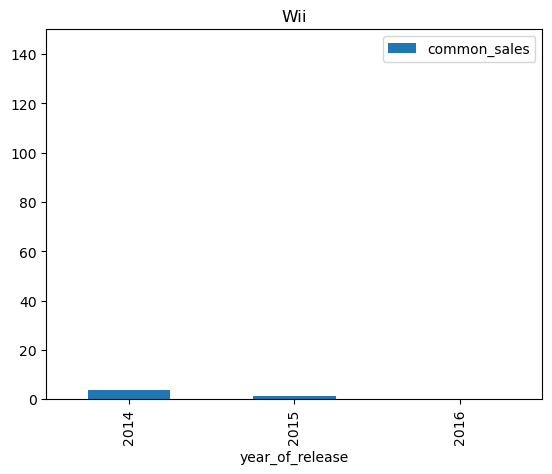

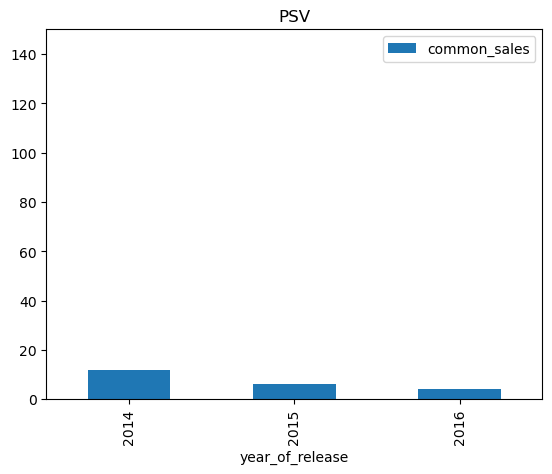

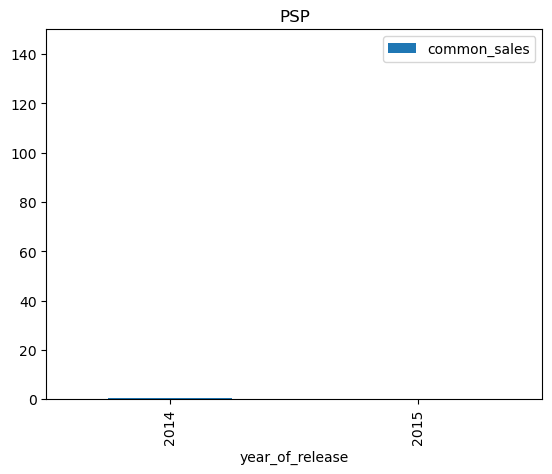

In [25]:
for i in data_actual['platform'].unique():
    (data_actual [data_actual ['platform'] == i]
    .pivot_table (index = 'year_of_release', values = 'common_sales', aggfunc = 'sum')
    .plot (kind = 'bar', title = i, ylim = (0, 150)))

Проверим выручку за данный период

In [26]:
(data_actual
    .pivot_table (index = 'platform', values = 'common_sales', aggfunc = 'sum')
    .reset_index()
    .sort_values (by = 'common_sales', ascending = False)
)

,platform,common_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


***Вывод***

Из данного анализа можно сделать следующий вывод: 
1. PS3 , X360 , Wii находятся на затухающей стадии => вероятнее всего данные платформы скоро уйдут с рынка и на них не следует делать акцент, то что они в топе по выручке (таблице сверху) объясняется тем, что они зарабатывали достаточно много на пике и вытащили за счет своего падения 
2. согласно постоеным графикам интересно обратить внимния на следующие платформы : PS4 , XOne, 3DS , PC
    PS4 - Наблюдаем восходящий тренд, к тому же PS3 является довольно старой моделью => что PS4 замена 3 версии и набирает свою популярность
    XOne - идентичная история PS4 - PS3, выглядит так как будто платформа на заре становления 
    3DS - имеет нисходящий тренд скорее всего уже на пиковые значения по популярности не выйдет (т.е. была уже популярна)
    PC - имеет нисходящий тренд скорее всего уже на пиковые значения по популярности не выйдет (т.е. была уже популярна)
    
Из этого всего следуюет, что потенциально прибыльные платформы : PS4 , XOne

### Проверка выбросов
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

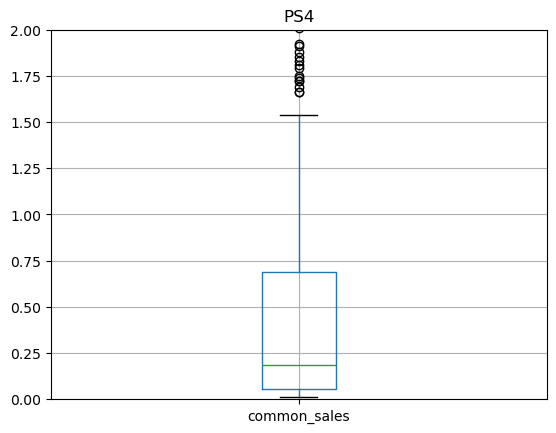

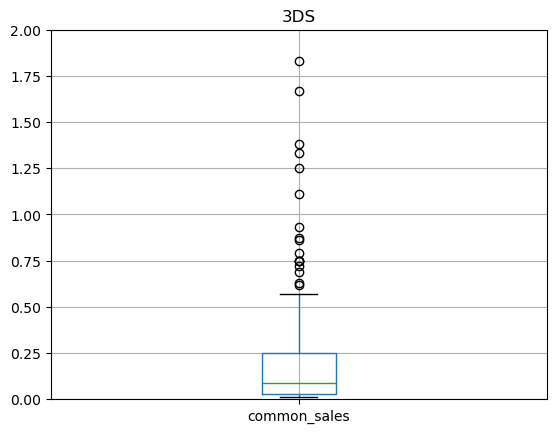

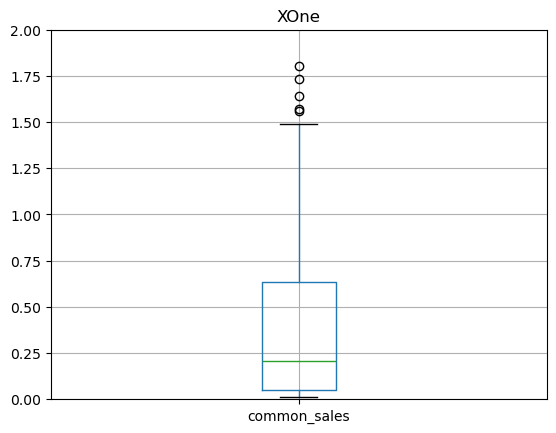

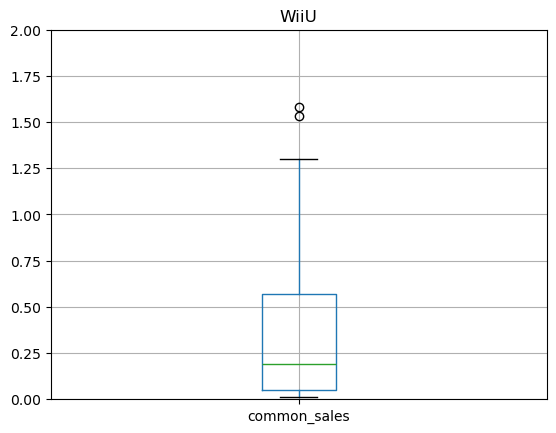

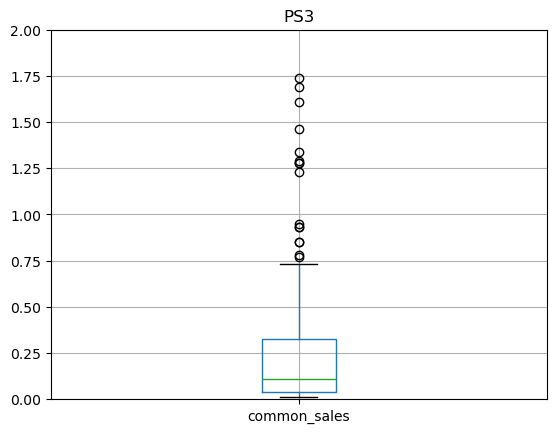

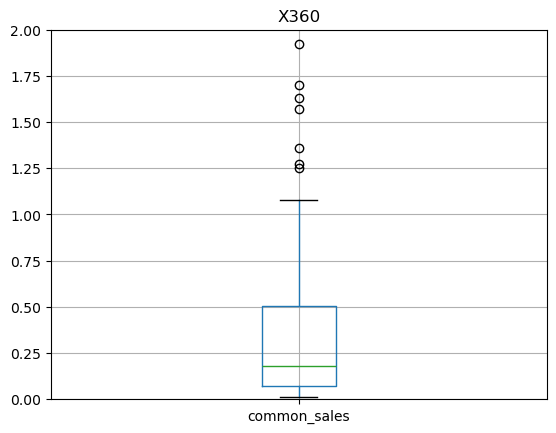

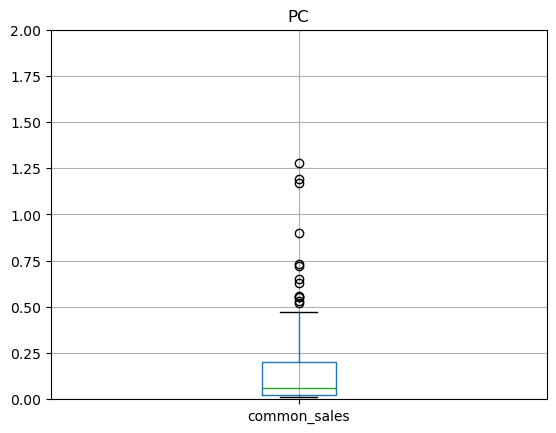

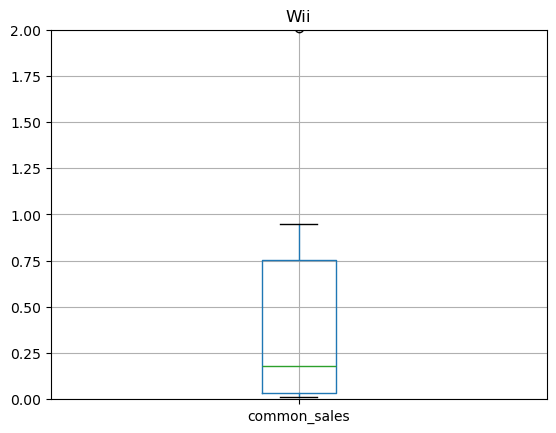

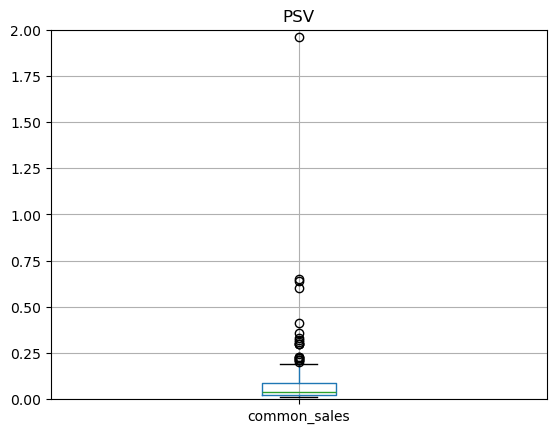

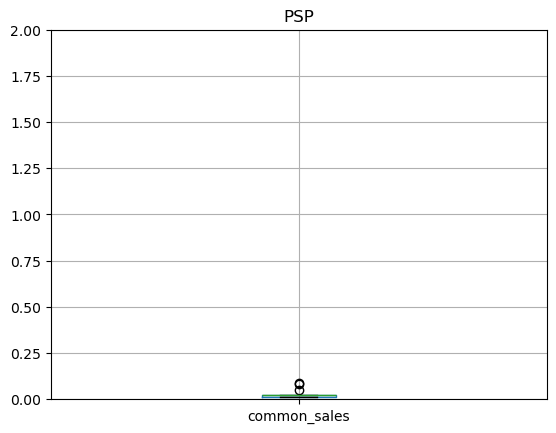

In [27]:
for i in data_actual['platform'].unique():
    data_actual[data_actual['platform'] == i].boxplot('common_sales')
    plt.title ( i)
    plt.ylim (0, 2)
    plt.show()

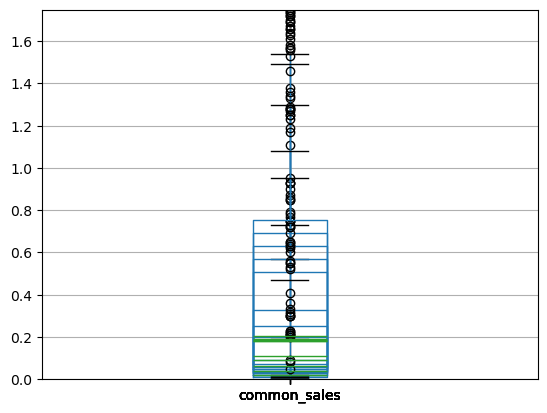

In [28]:
for i in data_actual['platform'].unique():
    data_actual[data_actual['platform'] == i].boxplot('common_sales')
    plt.ylim (0, 1.75)

**Вывод** 
1. имеются некоторые аномалии с точки зрения алгоритмов, но скорее всего это какие-то топовые игры по продажам, т.к. цифры расположены в рамках допустимого. 
2. После посроения всех диаграмм на 1м графике можно сделать следующий вывод, что допустимые значения всех продах находятся в интервале от 0 до 0.8 (25% - 75%) , игры у которых продажи> 1.6 считаются аномалиями 

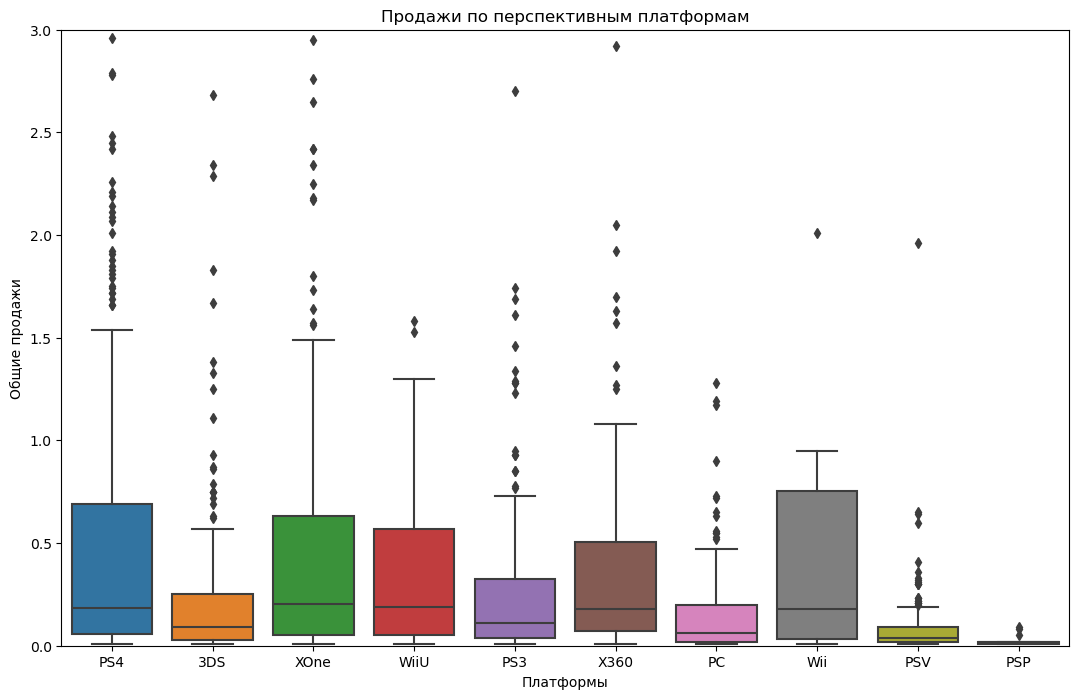

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.boxplot(data=data_actual, y='common_sales', x='platform')

plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 3)

plt.show()

### Изучение корреляций 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качетстве **примера**, возьмем компанию платформу которая стремиться на подъем PS4 и првоедем исследование 

In [30]:
data_actual_PS4 = data_actual [data_actual ['platform'] == 'PS4']
data_actual_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Построим диаграмму рассеяния для показателей отзывы - общие продажи

0.40266141068104083

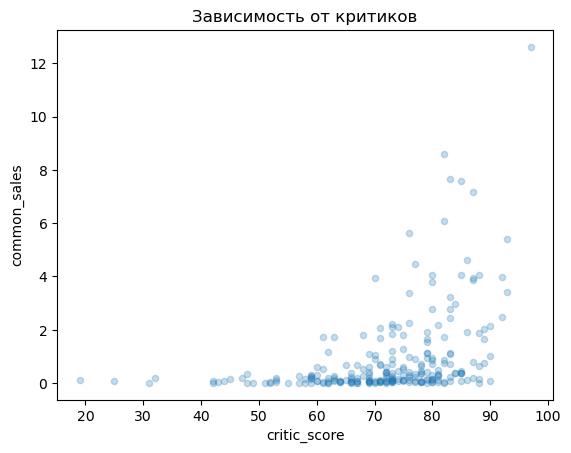

In [31]:
(data_actual_PS4 
    .sort_values ('critic_score')
    .plot(kind = 'scatter' , x = 'critic_score', y = 'common_sales' , alpha = 0.25, title = 'Зависимость от критиков')
)
display (data_actual_PS4['critic_score'].corr(data_actual_PS4['common_sales']))

-0.040131589472697286

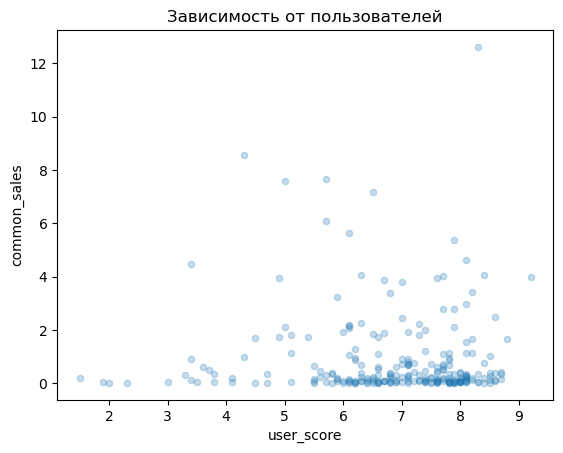

In [32]:
(data_actual_PS4
    .sort_values ('user_score')
    .plot(kind = 'scatter' , x = 'user_score', y = 'common_sales' , alpha = 0.25, title = 'Зависимость от пользователей')
)
display (data_actual_PS4['user_score'].corr(data_actual_PS4['common_sales']))

Наблюдается следующая зависимость: 

1. корреляционный коэф. Пирсона между показателем продаж и оценками критиков имеет среднюю зависимость, т.е. шансов что продукт с высокой оценкой критика продастся лучше
2. На счет оценок пользователей, такой зависимоти нет, коэф. Пирсона околонулевой. 

### Соотношение выводов
Соотнесите выводы с продажами игр на других платформах.

Соотнесем выводы с продуктом платформы XOne

'КРИТИКИ Коэф. Пирсона для платформы: PS4 = 0.40'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: PS4 = -0.04'

'КРИТИКИ Коэф. Пирсона для платформы: 3DS = 0.31'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: 3DS = 0.22'

'КРИТИКИ Коэф. Пирсона для платформы: XOne = 0.43'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: XOne = -0.07'

'КРИТИКИ Коэф. Пирсона для платформы: WiiU = 0.37'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: WiiU = 0.41'

'КРИТИКИ Коэф. Пирсона для платформы: PS3 = 0.45'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: PS3 = -0.17'

'КРИТИКИ Коэф. Пирсона для платформы: X360 = 0.53'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: X360 = -0.14'

'КРИТИКИ Коэф. Пирсона для платформы: PC = 0.17'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: PC = -0.07'

'КРИТИКИ Коэф. Пирсона для платформы: Wii = nan'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: Wii = 1.00'

'КРИТИКИ Коэф. Пирсона для платформы: PSV = 0.04'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: PSV = -0.17'

'КРИТИКИ Коэф. Пирсона для платформы: PSP = nan'

'ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: PSP = nan'

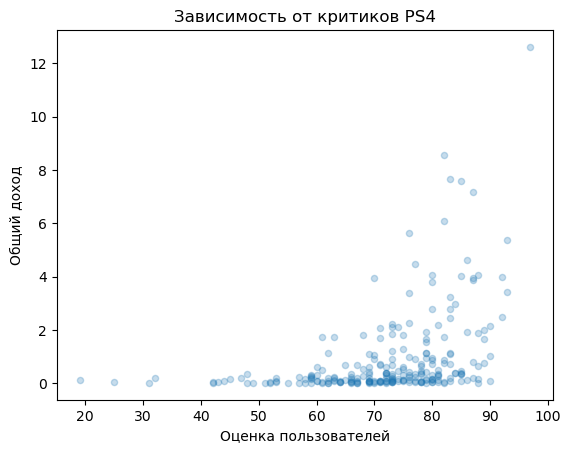

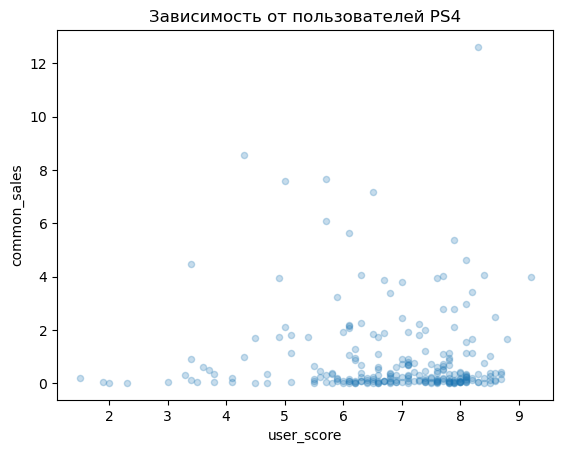

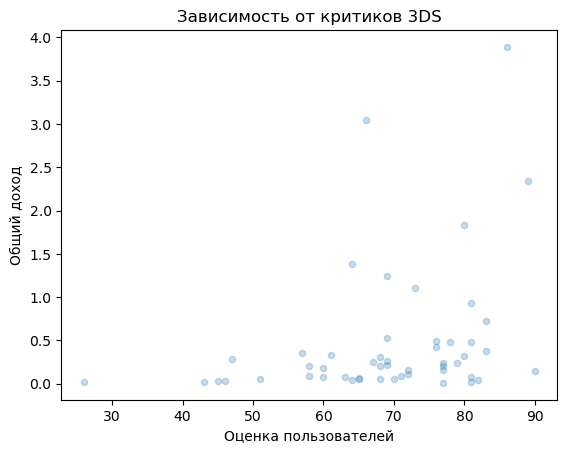

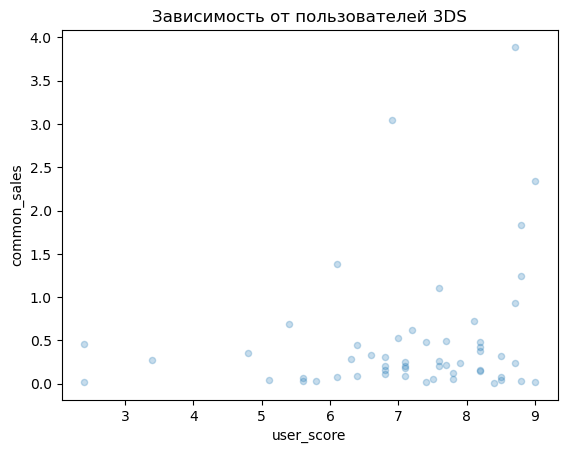

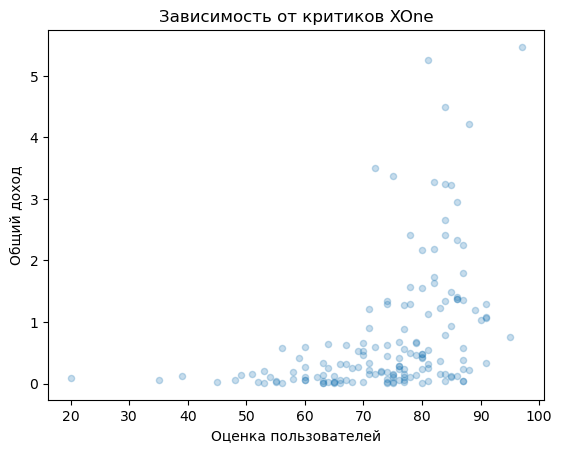

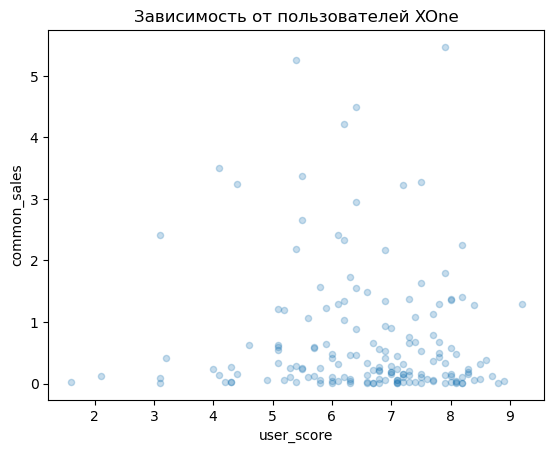

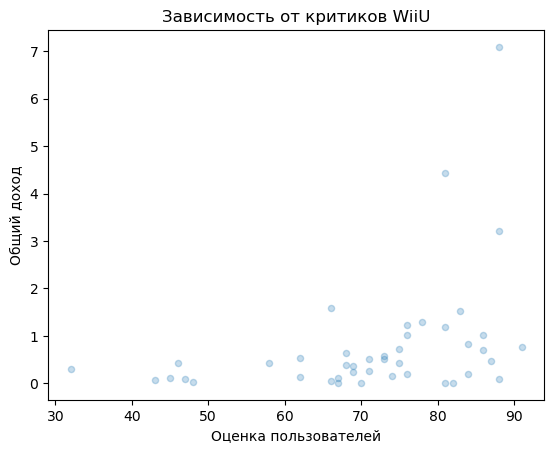

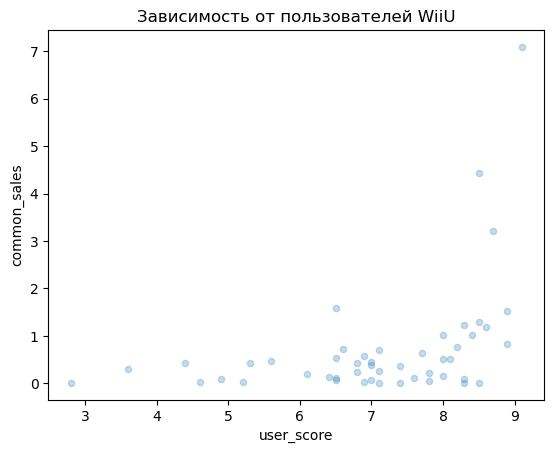

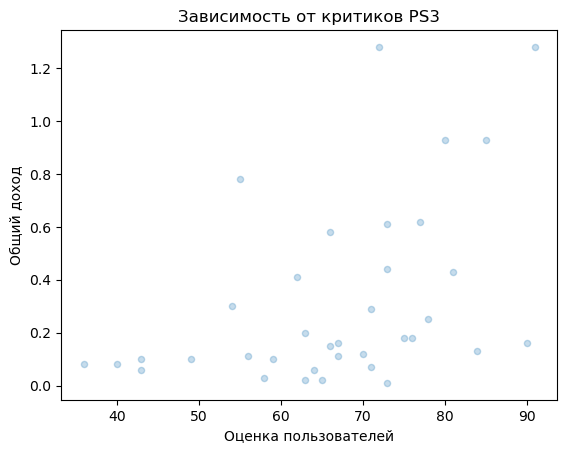

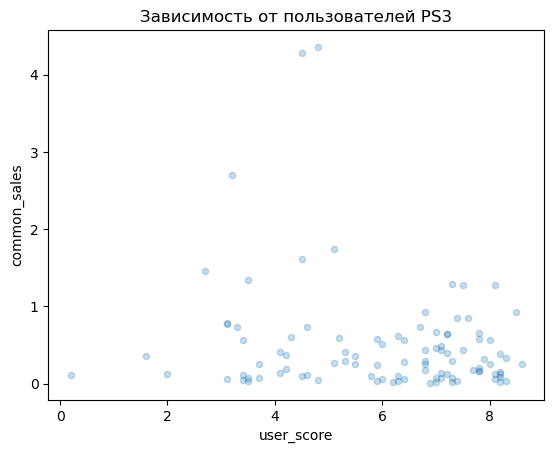

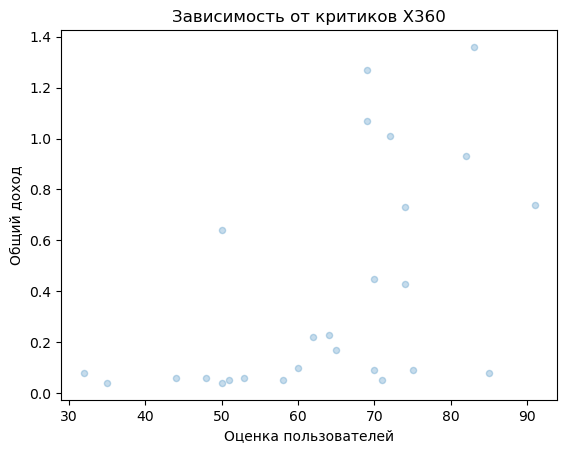

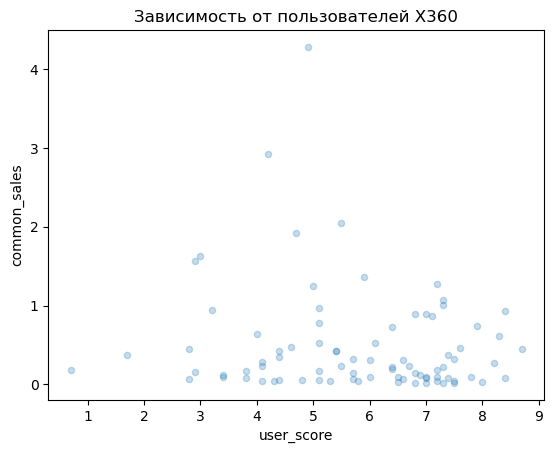

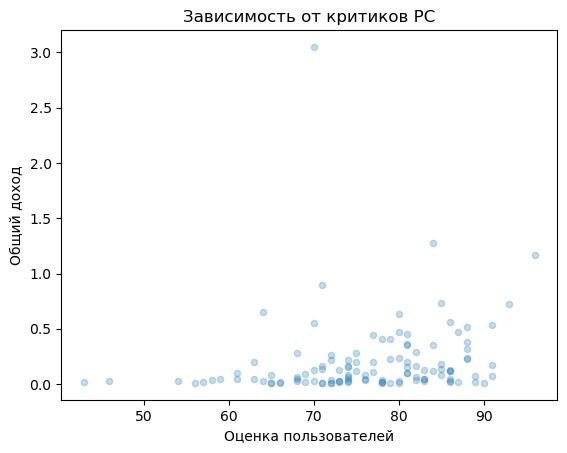

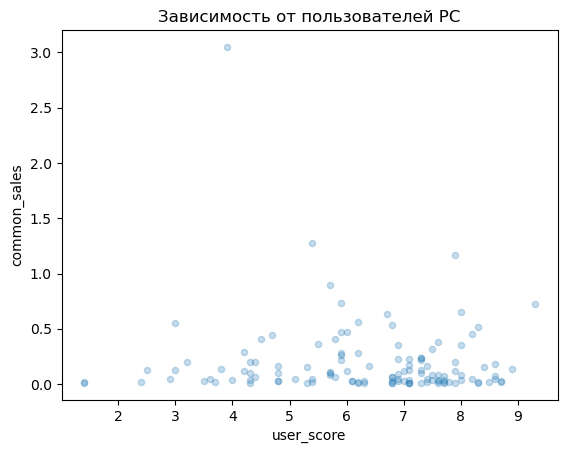

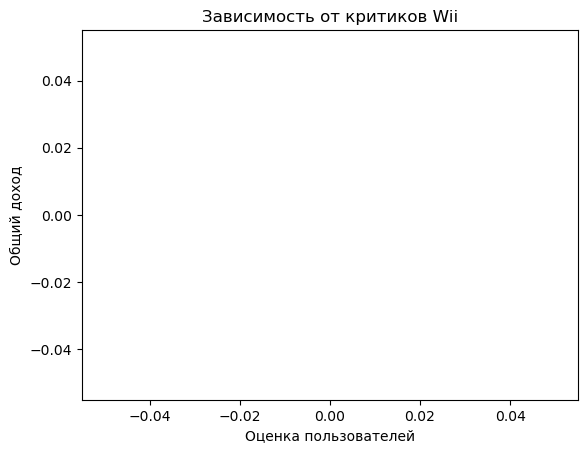

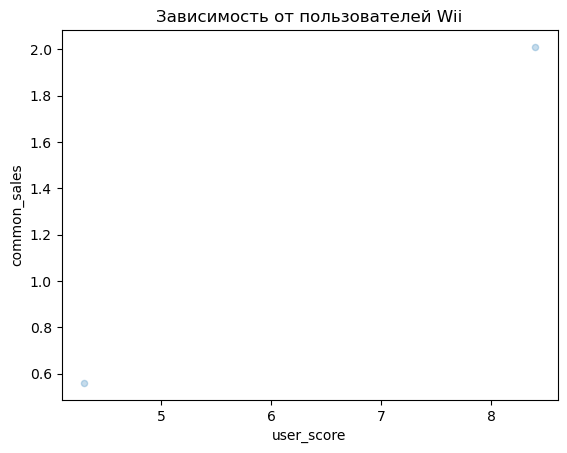

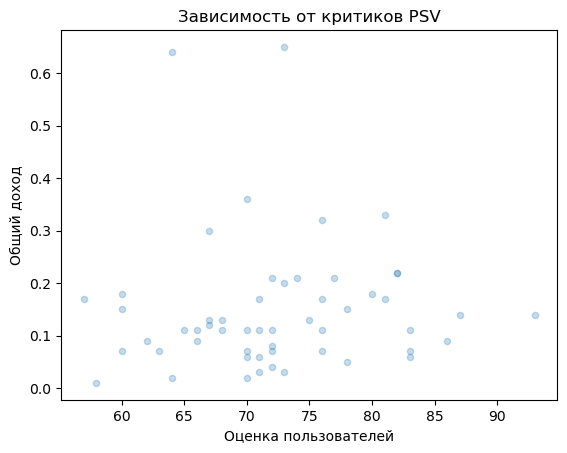

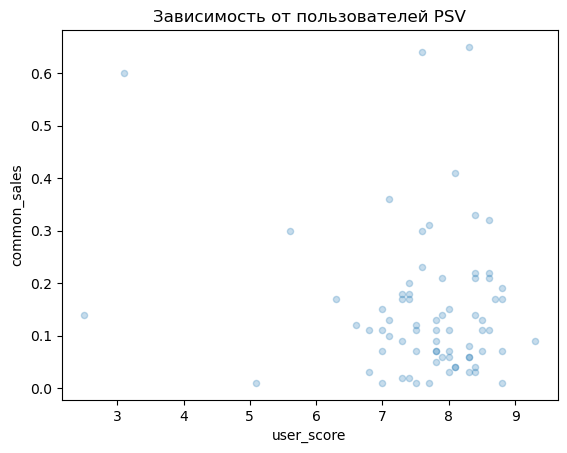

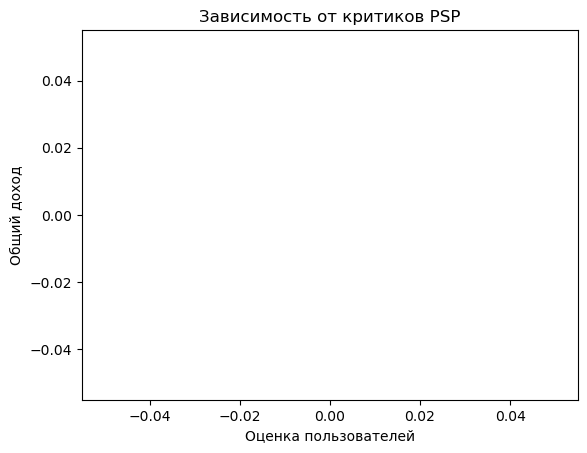

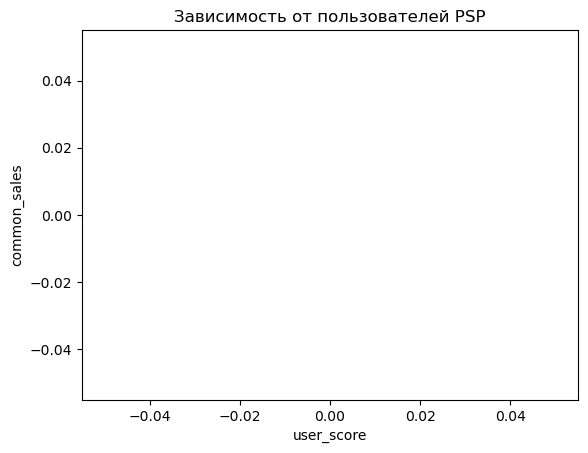

In [33]:
for i in data_actual ['platform'].unique():
    
    data_actual_xone = data_actual [data_actual ['platform'] == i]
    
    plot = (data_actual_xone 
        .sort_values ('critic_score')
        .plot(kind = 'scatter' , x = 'critic_score', y = 'common_sales' , 
        alpha = 0.25, title = (f"Зависимость от критиков {i}"))
    )
    plot.set_xlabel ('Оценка критиков')
    plot.set_ylabel ('Общий доход')
    plt.show
    
    display (f"КРИТИКИ Коэф. Пирсона для платформы: {i} = {data_actual_xone['critic_score'].corr(data_actual_xone['common_sales']):.2f}")
    
    plot1 =(data_actual_xone
        .sort_values ('user_score')
        .plot(kind = 'scatter' , x = 'user_score', y = 'common_sales' , 
        alpha = 0.25, title = (f"Зависимость от пользователей {i}"))
    )
    plot.set_xlabel ('Оценка пользователей')
    plot.set_ylabel ('Общий доход')
    plt.show
    
    display (f"ПОЛЬЗОВАТЕЛИ Коэф. Пирсона для платформы: {i} = {data_actual_xone['user_score'].corr(data_actual_xone['common_sales']):.2f}")

Наблюдается идентичная картина. Предположение построено верно. В случаях PSP, Wii - нет смысла смотреть на них, данные не релевантны

### Общее распределение игр по жанрам 
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


<Axes: xlabel='year_of_release'>

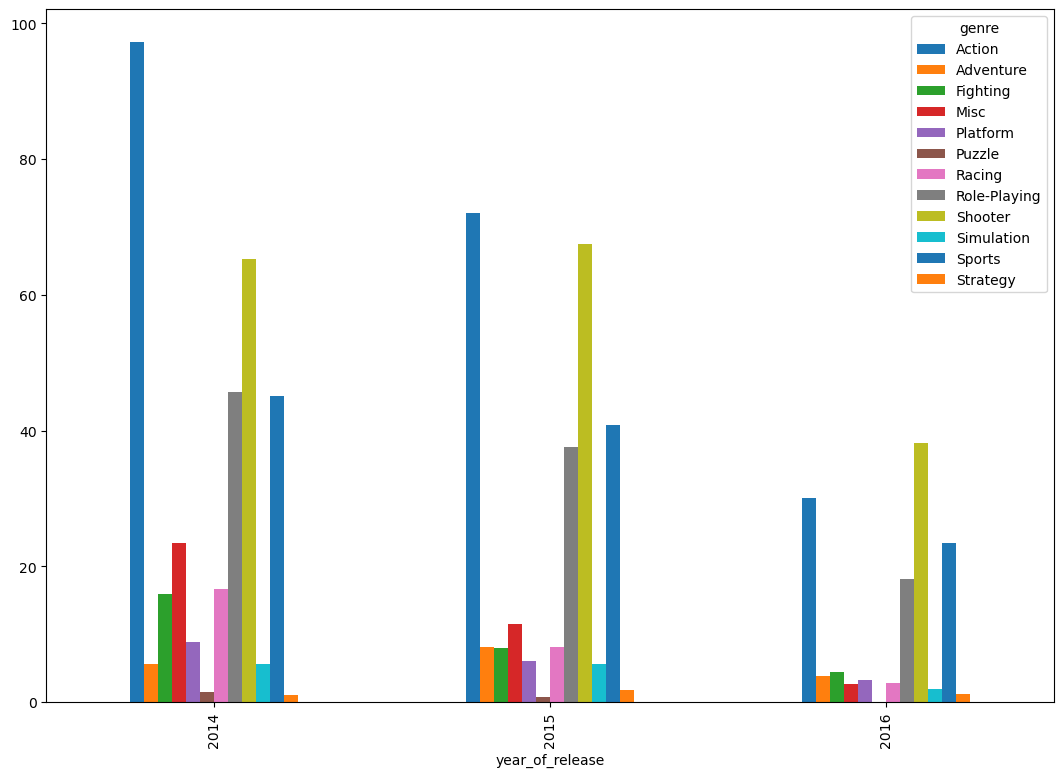

In [34]:
display (data_actual
    .pivot_table(index = 'year_of_release', columns = 'genre' , values = 'common_sales', aggfunc = 'sum')
)
(data_actual
    .pivot_table(index = 'year_of_release', columns = 'genre' , values = 'common_sales', aggfunc = 'sum')
    .plot (kind = 'bar', figsize = (13,9))
)

Несомненно, после проведенного анализа, что выделяются жанры с высокими и низкими продажами.

К высокопродажным можно сразу отнести жанры: 
    Action , Shooter , Sports, role-Playing
    
В абсолютном проигрыше следующие жанры: 
    Puzzle, Strategy, Simulation, Adventure
    
**Продолжим изучение** построив диаграммы размаха, и сравним

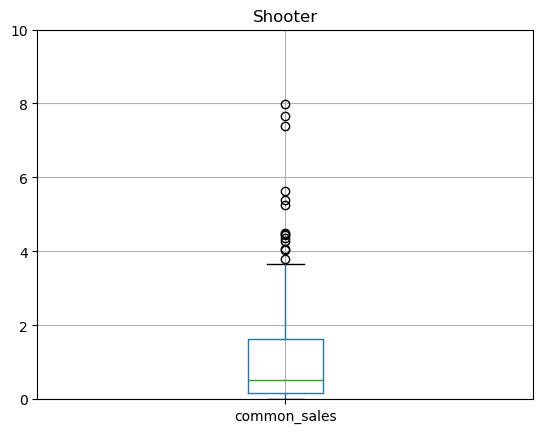

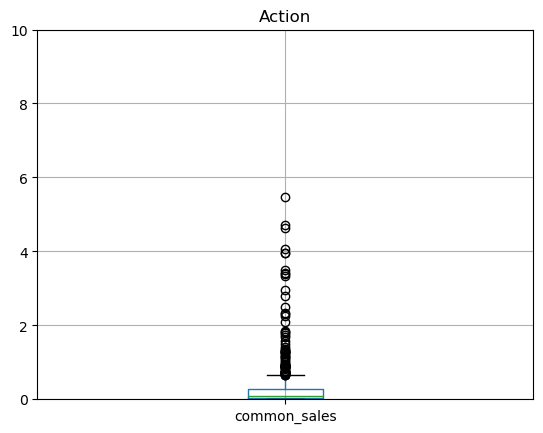

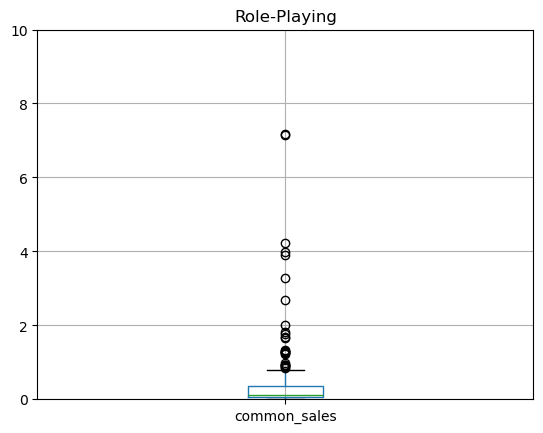

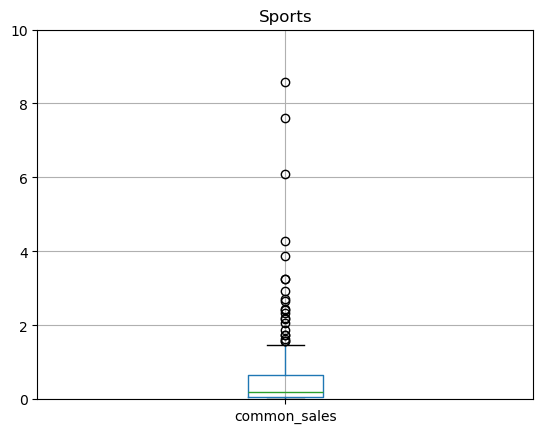

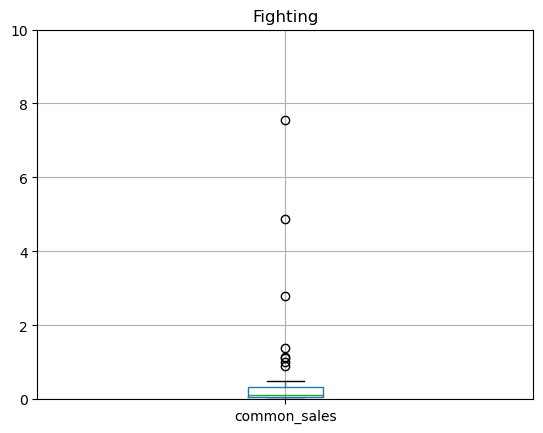

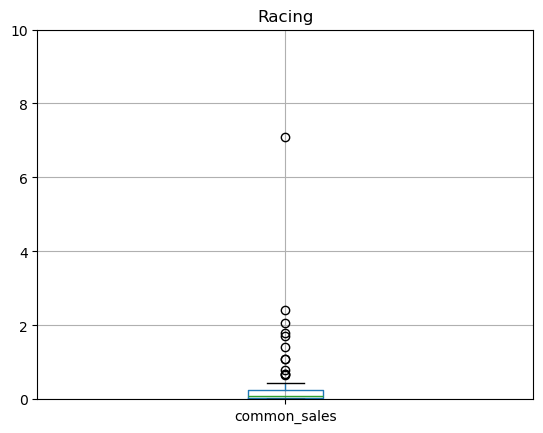

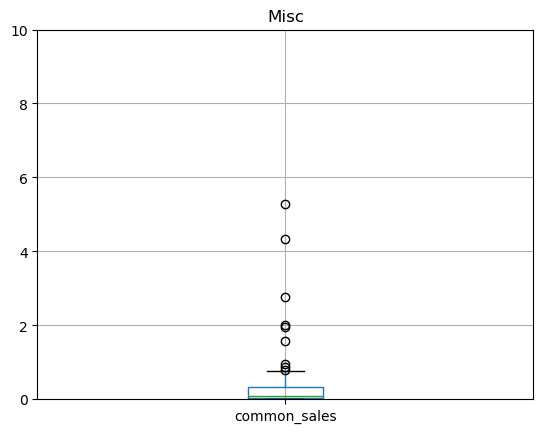

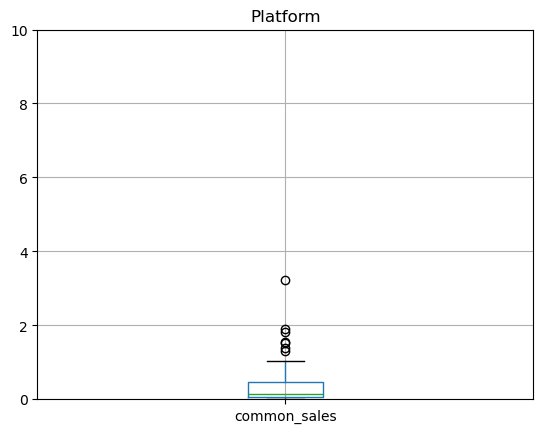

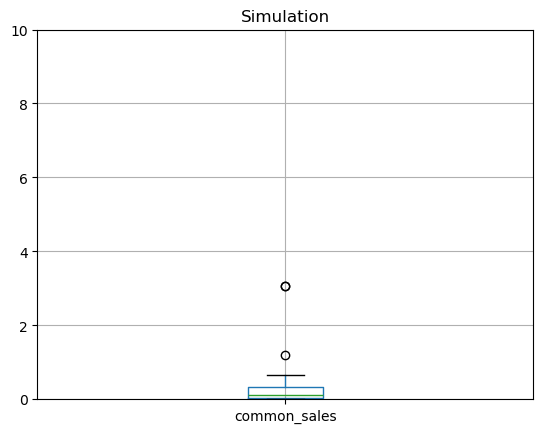

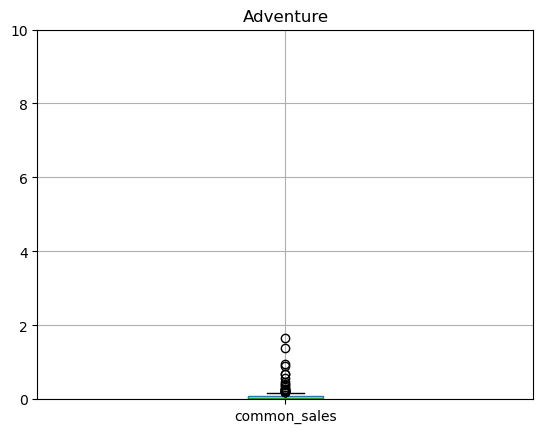

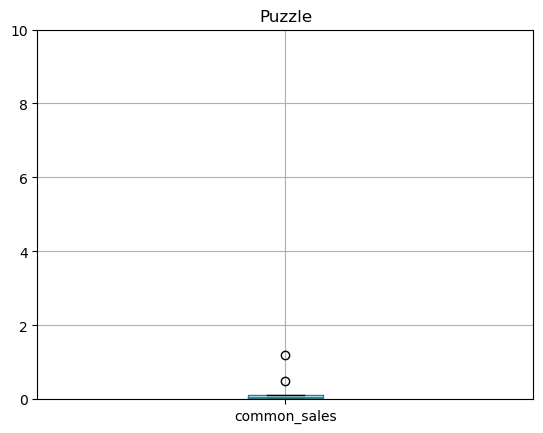

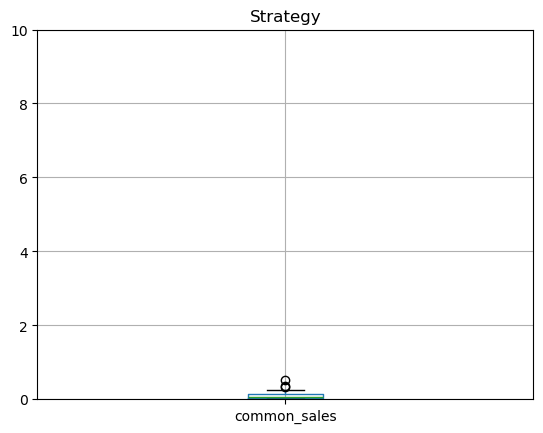

In [35]:
for i in data_actual['genre'].unique():
    data_actual[data_actual['genre'] == i].boxplot('common_sales')
    plt.title ( i)
    plt.ylim (0, 10)
    plt.show()

Наименьшее количество выбросов и более стабильные значения попадают в жанр: 

Shooter

В следующую группу можно отнести : 
Role-Playing, Sports

В Action   - слишком большой разброс по данным, скорее всего там ситуация где может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов.


Из анализа совместных данных делаем вывод что наиболее стабильными жанрами в плане денег Shooter

### Общий вывод по исследовательскому анализу 


1. Были изучены выпуски игр по годам. Релевантное количество подходящих  измерений находится после 2000 года, скорее всего потому что выпуск игр начался массово
2. Изучение продаж по платформам. Было определено что цикл жизни платформы укладывается в десятилетку. 
3. Создан датасет с необходимым набором данных. Выбран период 5 лет
4. Определены платформы лидеры, потенциально растущие платформы
5. Проверка аномалий
6. Узучены корреляции и проверены на соседних данных. Зависимость цены и оценки критиков - прямая. Зависимость цены и  оценки пользователей  - нет зависимости
7. Определены наиболее продаваемые жанры : Action , Shooter , Sports, role-Playing

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). 
Опишите различия в долях продаж.

Проверим данные в выделенном датасете и выделим топ 5 платформ для разных регионов (NA, EU, JP)

In [36]:
def top_platform(x):
    best_5 = (data_actual
        .pivot_table(index = 'platform', values = [x], aggfunc = 'sum')
        .sort_values(by = x, ascending = False)
        .head()
        .reset_index()
        ['platform']
    )
    display ('ТОП 5 платформ для региона:', x, best_5)
    display()
    
top_platform ('na_sales')
top_platform ('eu_sales')
top_platform ('jp_sales')

'ТОП 5 платформ для региона:'

'na_sales'

0     PS4
1    XOne
2    X360
3     3DS
4     PS3
Name: platform, dtype: object

'ТОП 5 платформ для региона:'

'eu_sales'

0     PS4
1    XOne
2     PS3
3      PC
4     3DS
Name: platform, dtype: object

'ТОП 5 платформ для региона:'

'jp_sales'

0     3DS
1     PS4
2     PSV
3     PS3
4    WiiU
Name: platform, dtype: object

Мы получили ТОП 5 платформ для каждого региона, формируем следующий датасет: 
X360, PS3, PS4, XOne, 3DS, PC, PSP, PSV
в итоге получается 8 платформ

In [37]:
best_5 = ['X360', 'PS3', 'PS4', 'XOne', '3DS', 'PC', 'PSP', 'PSV']

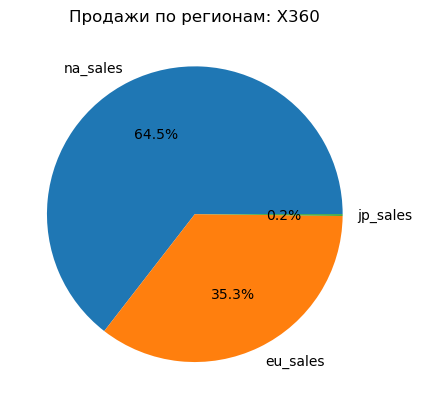

'Процентное распределение X360'

na_sales    64.508776
eu_sales    35.308867
jp_sales     0.182357
dtype: float64

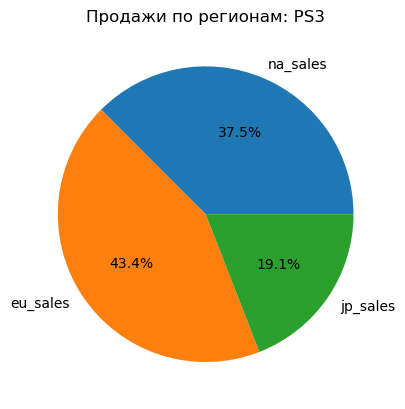

'Процентное распределение PS3'

na_sales    37.493624
eu_sales    43.427988
jp_sales    19.078388
dtype: float64

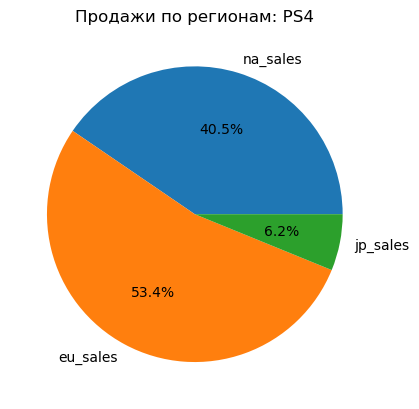

'Процентное распределение PS4'

na_sales    40.468667
eu_sales    53.367259
jp_sales     6.164074
dtype: float64

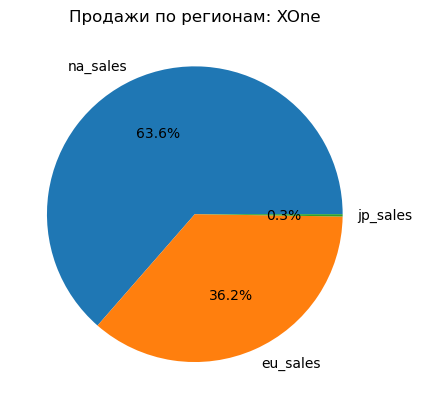

'Процентное распределение XOne'

na_sales    63.571652
eu_sales    36.178035
jp_sales     0.250313
dtype: float64

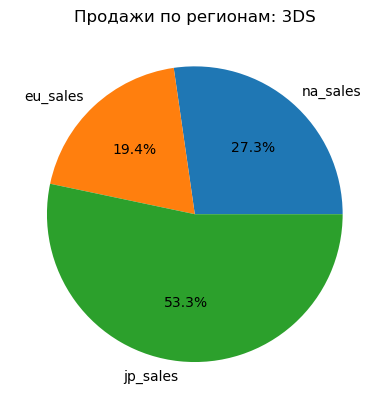

'Процентное распределение 3DS'

na_sales    27.277108
eu_sales    19.421687
jp_sales    53.301205
dtype: float64

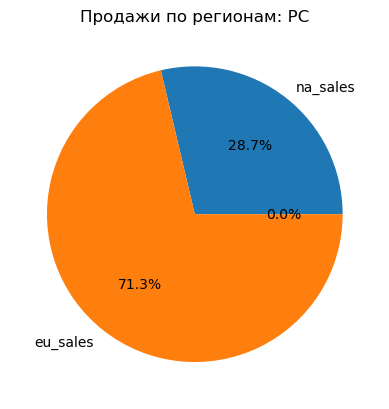

'Процентное распределение PC'

na_sales    28.690476
eu_sales    71.309524
jp_sales     0.000000
dtype: float64

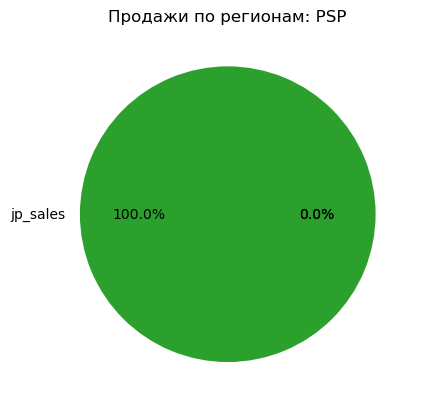

'Процентное распределение PSP'

na_sales      0.0
eu_sales      0.0
jp_sales    100.0
dtype: float64

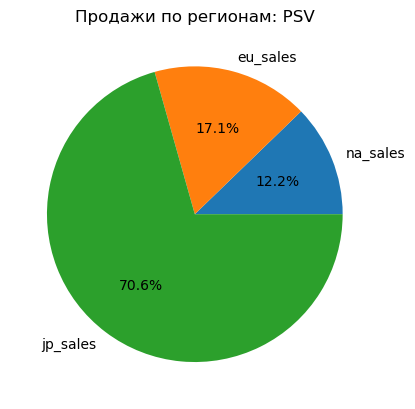

'Процентное распределение PSV'

na_sales    12.238951
eu_sales    17.144245
jp_sales    70.616804
dtype: float64

In [38]:
for i in best_5:
    sales_sum = data_actual[data_actual['platform'] == i][['na_sales', 'eu_sales', 'jp_sales']].sum()
    sales_sum_1 = sales_sum.sum()
    sales_sum_2 = sales_sum / sales_sum_1 *100
    sales_sum_2.plot (kind = 'pie', autopct='%1.1f%%')
    plt.title(f'Продажи по регионам: {i}')
    plt.ylabel('') 
    plt.show()
    display(f"Процентное распределение {i}",  sales_sum_2)

**Вывод** 
Из этого всего видно что многие платформы ориентированы на регион, т.е. в каком то из регионов продажи лучше, а в каком то хуже. 

явный пример: PC, где продажи есть только в 2х регионах или XOne и X360.

Распределение платформ по регионам: 

X360: Америка - 64,5 Европа - 35,3 Япония - 0,2

PS3: Америка - 37.5 Европа - 43.4 Япония - 19.1

PS4: Америка - 40.5 Европа - 53.4 Япония - 6.1

XOne: Америка - 63.6 Европа - 36.2 Япония - 0.3 

3DS: Америка - 27.3 Европа - 19.4  Япония - 53.3

PC: Америка - 28.7 Европа - 71.3 Япония - 0

PSP: Америка - 0 Европа - 0 Япония - 100

PSV: Америка - 12.2 Европа - 17.1 Япония - 70.6


### Самые популярные жанры (топ-5). 
Поясните разницу

In [39]:
def top_genre(x):
    best_5 = (data_actual
        .pivot_table(index = 'genre', values = [x], aggfunc = 'sum')
        .sort_values(by = x, ascending = False)
        .head()
        .reset_index()
        ['genre']
    )
    display ('ТОП 5 жанров для региона:', x, best_5)
    display()
    
top_genre ('na_sales')
top_genre ('eu_sales')
top_genre ('jp_sales')

'ТОП 5 жанров для региона:'

'na_sales'

0         Shooter
1          Action
2          Sports
3    Role-Playing
4            Misc
Name: genre, dtype: object

'ТОП 5 жанров для региона:'

'eu_sales'

0          Action
1         Shooter
2          Sports
3    Role-Playing
4          Racing
Name: genre, dtype: object

'ТОП 5 жанров для региона:'

'jp_sales'

0    Role-Playing
1          Action
2        Fighting
3            Misc
4         Shooter
Name: genre, dtype: object

Так же наблюдается различие в предпочитаемых жанрах, скорее всего это наблюдается из-за культурных различий. 
Предпочтения С. Америки : 
Action Shooter Sports Role-Playing Misc
Предпочтения Европы : 
Action Shooter Sports Role-Playing Racing
Предпочтения Японии : 
Role-Playing Action Misc Fighting Platform

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [40]:
(data_actual
    .pivot_table (index =  'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
)

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


Действительно влияние есть, некоторые категории продаются намного лучше чем другие. 

Т.е. такие категории:
E, M

Средняя продажа: 
E10+, T

Вообще не продаются: 
EC, RP

Так же есть различия по регионам, некотрые предпочтительные категории рейтинга отличаются друг от друга. 

## Проверить гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [41]:
data_actual_xone = data_actual[ (data_actual['platform'] == 'XOne') & ~(data_actual['user_score'].isna())]
data_actual_pc = data_actual[ (data_actual['platform'] == 'PC') & ~(data_actual['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind (data_actual_xone['user_score'] , data_actual_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод** 

Не получилось отвергнуть нулевую гипотезу, двигаемся с тем, что гипотеза о том что пользовательские рейтинги данных платформ равны. 

### Средние пользовательские рейтинги жанров Action и Sports  разные

Сформируем нулевую гипотезу и альтернативную : 

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports не равны

В случае если не отвергнется нулевая гипотеза, то на поставленный вопрос будет ответ нет. 

In [42]:
data_actual_genre_action = data_actual[ (data_actual['genre'] == 'Action') & ~(data_actual['user_score'].isna())]
data_actual_genre_sports = data_actual[ (data_actual['genre'] == 'Sports') & ~(data_actual['user_score'].isna())]

alpha = 0.05

results = st.ttest_ind (data_actual_genre_action['user_score'] , data_actual_genre_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую теорию о равности пользовательских рейтингов. Придерживаемся гипотезы о том что рейтинги данных жанров не равны! 

## Общие вывод

Исследование: 

Необходимо было определить закономерности успешности игр . Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Пройденые шаги:
- [x] Открыть данные 
- [x] Подготовить данные 
- [x] Проведите исследовательский анализ данных 
- [x] Составьте портрет пользователя каждого региона 
- [x] Проверьте гипотезы 
- [x] Напишите общий вывод 

В результате можно сделать следующие выводы: 
1. Потенциально рост можно ожидать от следующих платформ XOne и PS4
2. При большей оценке критиков большая вероятность того, что продукт будет лучше продаваться 
3. К наиболее успешным жанрам можно отнести следующие:  Shooter
4. Предпочтения в разных регионах к платформам тоже разные, У Америки и Европы предпочтения совпадают, а вот Японская культура имеет отличие: 
- Америка: X360, PS3, PS4, XOne, 3DS
- Европа: PS3, PS4, X360, 3DS, PC
- Япония: 3DS, PS3, PSP, PSV, PS4

        Распределение по регионам: 

        X360: Америка - 64,5 Европа - 35,3 Япония - 0,2

        PS3: Америка - 37.5 Европа - 43.4 Япония - 19.1

        PS4: Америка - 40.5 Европа - 53.4 Япония - 6.1

        XOne: Америка - 63.6 Европа - 36.2 Япония - 0.3 

        3DS: Америка - 27.3 Европа - 19.4  Япония - 53.3

        PC: Америка - 28.7 Европа - 71.3 Япония - 0

        PSP: Америка - 0 Европа - 0 Япония - 100

        PSV: Америка - 12.2 Европа - 17.1 Япония - 70.6

5. Предпочтения в разных регионах к жанрам тоже разные:
- Америка: Action, Shooter, Sports, Role-Playing, Misc
- Европа: Action, Shooter, Sports, Role-Playing, Racing
- Япония:  Role-Playing, Action, Misc, Fighting, Platform
6. Рейтинг ESRB влияет на продажи
- Высокопродаваемые категории: E, M
- Средняя продажа: E10+, T
- Вообще не продаются: EC, RP

Так же есть различия по регионам, некотрые предпочтительные категории рейтинга отличаются друг от друга.
7. Проверены гипотезы, принимаются следующие: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные

Наиболее продаваемая игра (предполагаемая оценка: 

Игра выпущенная на платформе: XOne и PS4, жанр: Action , Shooter , Sports, role-Playing, имеющая высокие оценки критиков, относящиеся к категориям  E, M